# Data Science - Module 2 - Final Project Submission

* Student Name: **James Toop**
* Student Pace: **Self Paced**
* Scheduled project review date/time: **Wednesday, 23rd December 2020 - 9.30pm GMT**
* Instructor name: **Jeff Herman**
* Blog post URL: **TBC**

## Table of Contents
1. [Business Case](#business-case)
2. [Exploratory Data Analysis](#eda)
    1. [Discovery](#data-discovery)
    2. [Updated Field Descriptions](#updated-field-descriptions)
    2. [Preprocessing](#data-preprocessing)
    
3. [Linear Regression](#linear-regression)
    1. [Model v0.1](#model-v01)
    2. [Model v0.2](#model-v02)
    3. [Model v0.3](#model-v03)
    4. [Model v1.0](#model-v10)
    5. [Model v1.1](#model-v11)
    6. [Model v1.2](#model-v12)
    7. [Model Evaluation - Train-Test Split](#model-evaluation-train-test-split)
    8. [Model Evaluation - Cross Validation](#model-evaluation-cross-validation)

---
<a name="business-case"></a>
## 1. Business Case

A property development company wants to better understand the different factors that influence the sale price of a property to better inform the planning, design and marketing of new build or renovated properties within the King County area of Washington State.  

To this end they are keen to use multivariate linear regression analysis to assist in their decision making processes, in particular the company are interested in understanding the effect that variables that they can control have on the property price including following:

* What size of property to build? (including overall living space and number of bedrooms)
* What effect does the age of a property have on price? (to show that newer houses sell for more than older houses that haven't been renovated).
* What locations or features offer the best return on investment?
* What could a final price of the property be given the input variables?

---
<a name="eda"></a>
## 2. Exploratory Data Analysis (EDA)

<a name="data-discovery"></a>
### 2A. Data Discovery

This section presents an initial step to investigate, understand and document the available data fields and relationships, highlighting any potential issues / shortcomings within the datasets supplied.

In [1]:
# Import the relevant libraries for data discovery and exploratory data analysis
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Set styles and color palette for Seaborn
plt.style.use('seaborn-whitegrid')
pres_palette = ['#599191','#8dd8d3','#0b6374','#c0791b','#424242','#fd5b58','#d7e6a3','#d558ab','#27278b']
sns.set_palette(sns.color_palette(pres_palette))

In [2]:
# Import the relevant data file from the repository then inspect the data
house_sales = pd.read_csv('kc_house_data.csv')
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# View unique values for specific category fields
view_values = np.sort(house_sales['view'].unique())
condition_values = np.sort(house_sales['condition'].unique())
grade_values = np.sort(house_sales['grade'].unique())
floor_values = np.sort(house_sales['floors'].unique())
zipcode_values = np.sort(house_sales['zipcode'].unique())
renovated_values = np.sort(house_sales['yr_renovated'].unique())

print(len(view_values),"view rating options:\n", view_values)
print(len(condition_values),"condition rating options:\n", condition_values)
print(len(grade_values),"grade rating options:\n", grade_values)
print(len(floor_values), "floor options:\n", floor_values)
print(len(zipcode_values),"zipcodes:\n", zipcode_values)
print(len(renovated_values),"year renovated options:\n", renovated_values)

6 view rating options:
 [ 0.  1.  2.  3.  4. nan]
5 condition rating options:
 [1 2 3 4 5]
11 grade rating options:
 [ 3  4  5  6  7  8  9 10 11 12 13]
6 floor options:
 [1.  1.5 2.  2.5 3.  3.5]
70 zipcodes:
 [98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038
 98039 98040 98042 98045 98052 98053 98055 98056 98058 98059 98065 98070
 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 98108 98109
 98112 98115 98116 98117 98118 98119 98122 98125 98126 98133 98136 98144
 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199]
71 year renovated options:
 [   0. 1934. 1940. 1944. 1945. 1946. 1948. 1950. 1951. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1962. 1963. 1964. 1965. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 

In [6]:
# View value counts for specific category fields
print(house_sales['view'].value_counts(sort=False),"\n")
print(house_sales['waterfront'].value_counts(sort=False),"\n")
print(house_sales['grade'].value_counts(sort=False),"\n")
print(house_sales['condition'].value_counts(sort=False),"\n")

0.0    19422
3.0      508
4.0      317
2.0      957
1.0      330
Name: view, dtype: int64 

0.0    19075
1.0      146
Name: waterfront, dtype: int64 

3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64 

1       29
2      170
3    14020
4     5677
5     1701
Name: condition, dtype: int64 



In [7]:
# Review year renovated data as there are only 17755 records compared to the 21597 for other fields
house_sales['yr_renovated'].value_counts(ascending=False, dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

<a name="updated-field-descriptions"></a>
### 2B. Updated Field Descriptions

Having reviewed and researched the column headings provided in the repository, here is some more detail as to the descriptions of the data fields including some clarification on certain values within the fields.

**id**
: a unique identifier for a property

**date**
: date property was sold (note: uses US date formatting)

**price**
: sale price (target variable)

**bedrooms**
: number of bedrooms

**bathrooms**
: number of bathrooms (note: includes half and quarter bathrooms, e.g. a "half bathroom" would be a toilet & sink)
[view more detail](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/24804)

**sqft_living**
: square footage of the living space

**sqft_lot**
: square footage of the plot of the property

**floors**
: number of floors (levels) in the property (note that there are half floors)

**waterfront**
: dummy variable indicating that property has a view to a waterfront (boolean)

**view**
: a rating, between 0 and 4, describing the view of the property

**condition**
: a rating, between 1 and 5, describing the overall condition of the property, [view full detail](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#building%20condition)
 
* **1** - Poor
* **2** - Fair
* **3** - Average
* **4** - Good
* **5** - Very Good

**grade**
: overall grade given to the property unit representing the construction quality of improvements, [view full detail](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#building%20grade)

* **1-3** - Falls short of minimum building standards
* **4** - Generally older, low quality construction, does not meet code
* **5** - Low construction costs and workmanship, small, simple design.
* **6** - Lowest grade currently meeting building code, low quality materials and simple designs.
* **7** - Average grade of construction and design.
* **8** - Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
* **9** - Better architectural design with extra interior and exterior design and quality.
* **10** - Homes of this quality generally have high quality features. Finish work is better and more design quality is seen.
* **11** - Custom design and higher quality finish work.
* **12** - Custom design and excellent builders, all materials are of the highest quality.
* **13** - Generally custom designed and built, large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

**sqft_above**
: square footage of property above and including ground floor

**sqft_basement**
: square footage of the property below ground floor (i.e. the basement)

**yr_built**
: year the property was built

**yr_renovated**
: year the house was renovated

**zipcode**
: zip code of the property

**lat**
: latitude coordinate of the property

**long**
: longitude coordinate of the property

**sqft_living15**
: the average square footage of interior housing living space for the nearest 15 neighbours

**sqft_lot15**
: the average square footage of the land plots of the nearest 15 neighbours



<a name="data-preprocessing"></a>
### 2C. Data Preprocessing

In [8]:
# Check for duplicate records
len(house_sales[house_sales.duplicated()])

0

In [37]:
# Data preprocessing, converting data types and handling missing data
house_sales['date'] = pd.to_datetime(house_sales['date']) 
house_sales['waterfront'] = house_sales['waterfront'].fillna(0).astype(int)
house_sales['view'] = house_sales['view'].fillna(0).astype(int)
house_sales['yr_renovated'] = house_sales['yr_renovated'].fillna(0).astype(int)

# Create additional field deriving the age of the property from the maximum sale date within the dataset
house_sales['age'] = (house_sales['date'].max().year - house_sales['yr_built']) 

# Create additional field indicating whether a property was built or renovated in the last 15 years
house_sales['status']= np.where((house_sales['age']<=15)|(house_sales['yr_renovated']>=2000), 'new_renovated', 'old')

# Derive missing values in sqft_basement field with calculated values from sqft_living and sqft_above
for i in list(house_sales.loc[house_sales['sqft_basement'] == '?'].index.values):
    house_sales.loc[i,'sqft_basement'] = house_sales.loc[i,'sqft_living'] - house_sales.loc[i,'sqft_above']

# Convert data type having handled missing data for sqft_basement
house_sales['sqft_basement'] = house_sales['sqft_basement'].astype(float).astype(int)


# Remove outliers based on number of bedrooms, with one record having 33 bedrooms
house_sales = house_sales[(house_sales['bedrooms'] <= 6)]

# Remove outliers based on zero bathrooms as dubious as to whether you could define this as a house
house_sales = house_sales[(house_sales['bathrooms'] != 0)]

# Remove properties based on price of house being zero and less than $2M to lessen the impact of skew on the distribution
house_sales = house_sales[(house_sales['price'] > 0) & (house_sales['price'] <= 2000000)]

# Remove properties based on large lot area > 250000 square feet
house_sales = house_sales[(house_sales['sqft_lot'] <= 250000)]

In [38]:
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,status
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,60,old
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,64,old
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,82,old
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,50,old
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,28,old


In [39]:
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.124000e+04,2.124000e+04,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,...,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000
mean,4.597980e+09,5.181208e+05,3.351883,2.094115,2045.243879,12995.007298,1.489878,0.004802,0.213795,3.408992,...,1761.897411,283.346469,1970.978814,66.434510,98078.239831,47.559917,-122.214627,1970.924482,11934.882392,44.021186
std,2.876745e+09,2.868630e+05,0.871412,0.739487,855.646863,24483.402826,0.539434,0.069133,0.726376,0.649442,...,787.474657,428.361623,29.309167,358.042451,53.532974,0.138719,0.140228,668.241429,22713.937572,29.309167
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000,0.000000
25%,2.128000e+09,3.200000e+05,3.000000,1.500000,1420.000000,5013.000000,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470200,-122.329000,1480.000000,5094.750000,18.000000
50%,3.905101e+09,4.496940e+05,3.000000,2.250000,1900.000000,7560.000000,1.500000,0.000000,0.000000,3.000000,...,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571050,-122.231000,1830.000000,7587.500000,40.000000
75%,7.334501e+09,6.350000e+05,4.000000,2.500000,2520.000000,10488.250000,2.000000,0.000000,0.000000,4.000000,...,2180.000000,550.000000,1997.000000,0.000000,98118.000000,47.678500,-122.126000,2340.000000,10000.000000,64.000000
max,9.900000e+09,2.000000e+06,6.000000,6.500000,7730.000000,249126.000000,3.500000,1.000000,4.000000,5.000000,...,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000,115.000000


In [12]:
# Calculate the average sale price for old and new_renovated houses

print(house_sales.groupby(['status']).price.mean())

status
new_renovated    595806.795554
old              494853.886767
Name: price, dtype: float64


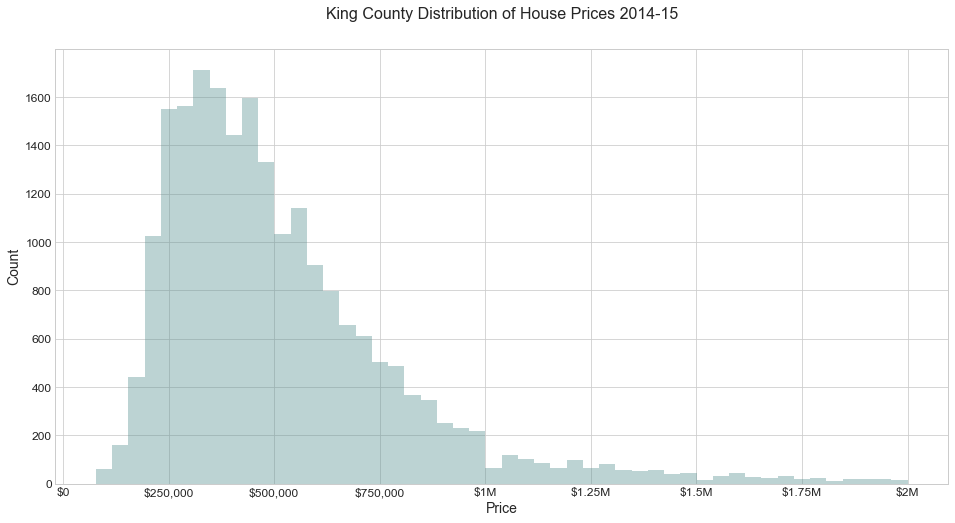

In [13]:
# Create a plot to look at the distribution of house prices across King County

existing_xvalues = [0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000]
readable_xvalues = ['$0','$250,000','$500,000','$750,000','$1M','$1.25M','$1.5M','$1.75M','$2M']
plt.figure(figsize=(16,8))
plt.title('King County Distribution of House Prices 2014-15', fontsize=16, pad=30)
price_dist = sns.distplot(house_sales['price'], kde=False)
price_dist.set_xlabel('Price', fontsize=14)
price_dist.set_ylabel('Count', fontsize=14)
plt.xticks(existing_xvalues, readable_xvalues, fontsize=12)
plt.yticks(fontsize=12)
plt.show();

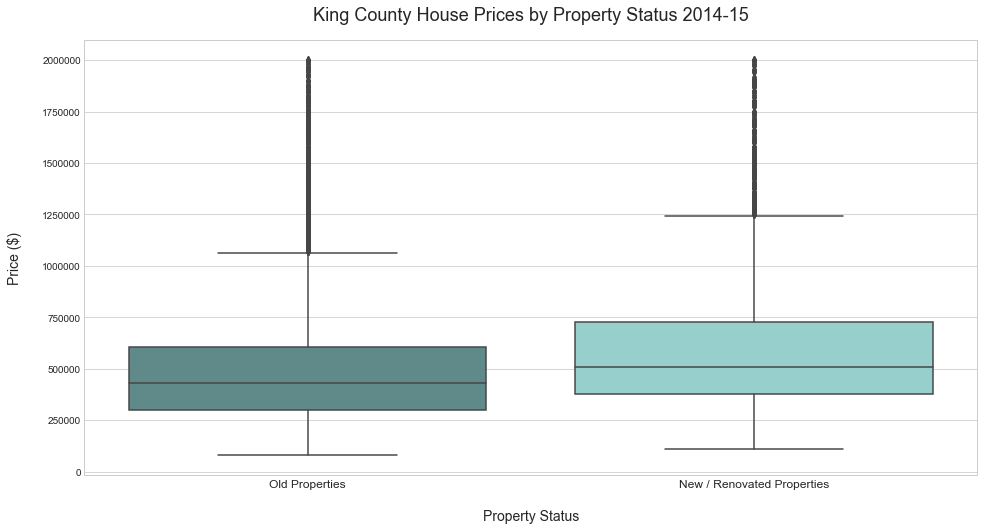

In [222]:
# Create a boxplot to show the shift in prices between recently built / renovated houses and old houses

plt.figure(figsize=(16,8))
plt.title('King County House Prices by Property Status 2014-15', fontsize=18, pad=20)
old_new_plt = sns.boxplot(
    x=house_sales['status'],
    y=house_sales['price'], 
    data=house_sales, 
    width=0.8, 
    palette=pres_palette
)

old_new_plt.set_xlabel('Property Status', fontsize=14, labelpad=20)
old_new_plt.set_ylabel('Price ($)', fontsize=14, labelpad=20)
old_new_plt.set_xticklabels(['Old Properties','New / Renovated Properties'], fontsize=12)
plt.xticks(fontsize=12)
plt.show();


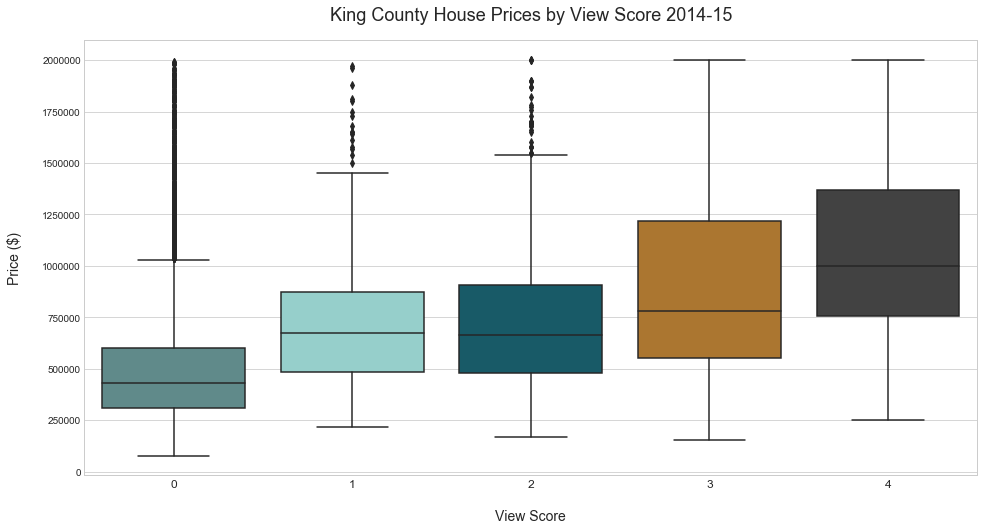

In [225]:
# Create a boxplot to show how view effects house prices

plt.figure(figsize=(16,8))
plt.title('King County House Prices by View Score 2014-15', fontsize=18, pad=20)
view_plt = sns.boxplot(
    x=house_sales['view'],
    y=house_sales['price'], 
    data=house_sales, 
    width=0.8, 
    palette=pres_palette
)

view_plt.set_xlabel('View Score', fontsize=14, labelpad=20)
view_plt.set_ylabel('Price ($)', fontsize=14, labelpad=20)
plt.xticks(fontsize=12)
plt.show();

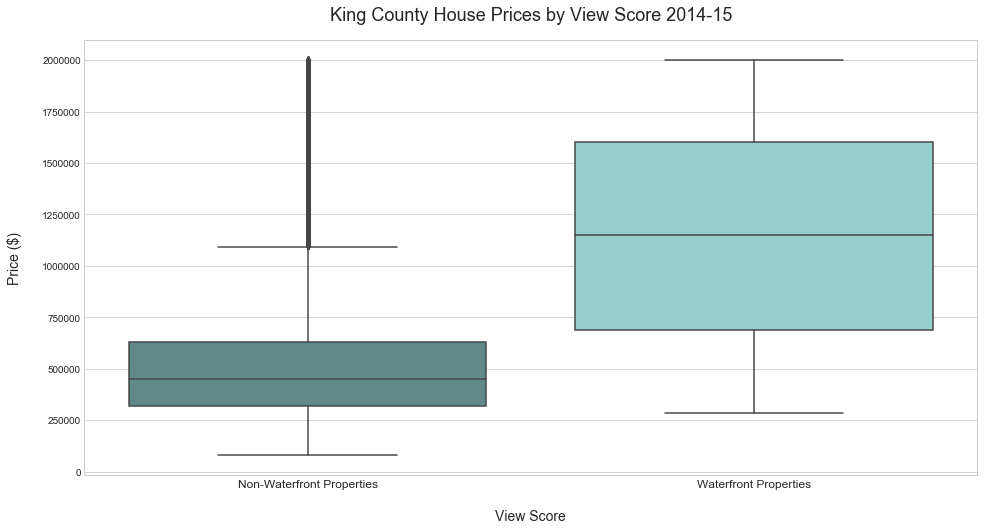

In [227]:
# Create a boxplot to show how being on the waterfront effects house prices

plt.figure(figsize=(16,8))
plt.title('King County House Prices by View Score 2014-15', fontsize=18, pad=20)
waterfront_plt = sns.boxplot(
    x=house_sales['waterfront'],
    y=house_sales['price'], 
    data=house_sales, 
    width=0.8, 
    palette=pres_palette
)

waterfront_plt.set_xlabel('View Score', fontsize=14, labelpad=20)
waterfront_plt.set_ylabel('Price ($)', fontsize=14, labelpad=20)
waterfront_plt.set_xticklabels(['Non-Waterfront Properties','Waterfront Properties'], fontsize=12)
plt.xticks(fontsize=12)
plt.show();

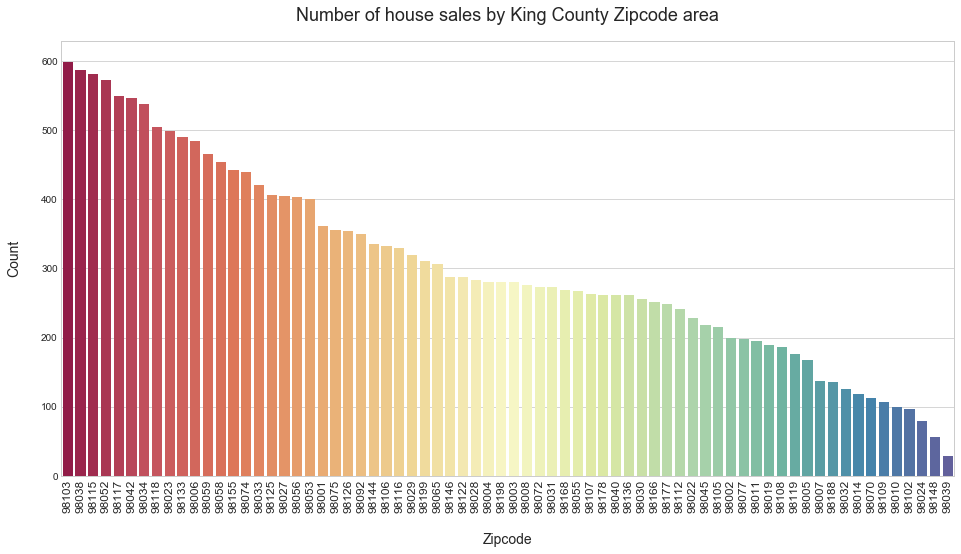

In [15]:
# Create new dataframe grouping the number of house sales by zipcode area

zipcode_houses = house_sales.groupby(['zipcode']).size().reset_index(name='count')

# Create a plot to look at the number of houses within each zipcode area

plt.figure(figsize=(16,8))
plt.title('Number of house sales by King County Zipcode area', fontsize=18, pad=20)
zipcode_dist = sns.barplot(
    x=zipcode_houses['zipcode'],
    y=zipcode_houses['count'], 
    data=zipcode_houses,
    order=zipcode_houses.sort_values('count', ascending=False).zipcode,
    palette='Spectral'
)

zipcode_dist.set_xlabel('Zipcode', fontsize=14, labelpad=20)
zipcode_dist.set_ylabel('Count', fontsize=14, labelpad=20)
zipcode_dist.set_xticklabels(zipcode_dist.get_xticklabels(), rotation=90, fontsize=12)
plt.show();

In [242]:
import folium
from folium import plugins
from folium.plugins import HeatMap

kc_map = folium.Map(location=[47.4352893, -122.0084416], tiles = "Stamen Terrain", zoom_start = 9)


house_sales['lat'] = house_sales['lat'].astype(float)
house_sales['long'] = house_sales['long'].astype(float)

heat_df = house_sales[['lat', 'long']]

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(kc_map)

kc_map

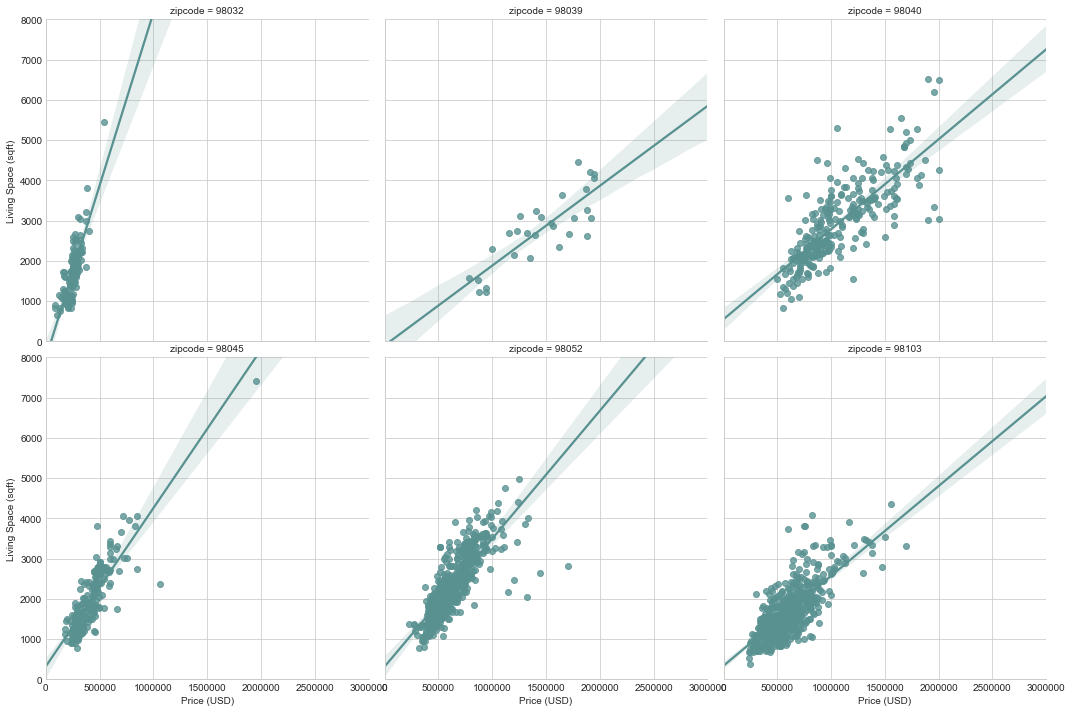

In [235]:
# Create a new dataframe filtering out specific zipcodes
# 98032 = Kent
# 98039 = Medina - least dense with house sales
# 98040 = Mercer Island
# 98045 = North Bend
# 98052 = Redmond
# 98103 = Seattle - most dense with house sales

zipcode_shorter = house_sales[(house_sales['zipcode']==98052)
                             | (house_sales['zipcode']==98032)
                             | (house_sales['zipcode']==98045)
                             | (house_sales['zipcode']==98040)
                             | (house_sales['zipcode']==98103)
                             | (house_sales['zipcode']==98039)]

# Create scatterplots to investigate how price varies with living space and between zipcodes

chart3 = sns.FacetGrid(zipcode_shorter, 
                  col="zipcode", 
                  col_wrap=3, 
                  ylim=(0, 8000), 
                  xlim=(0, 3000000),  
                  height=5)
chart3.map(sns.regplot, "price", "sqft_living", fit_reg=True, x_jitter=.1)
chart3.set_axis_labels('Price (USD)', 'Living Space (sqft)')
chart3.fig.subplots_adjust(wspace=.05, hspace=.05)
plt.show();

---
<a name="linear-regression"></a>
# 3. Linear Regression

In [17]:
# Import the relevant libraries for linear regression modelling

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

<a name="model-v01"></a>
### A. Model v0.1

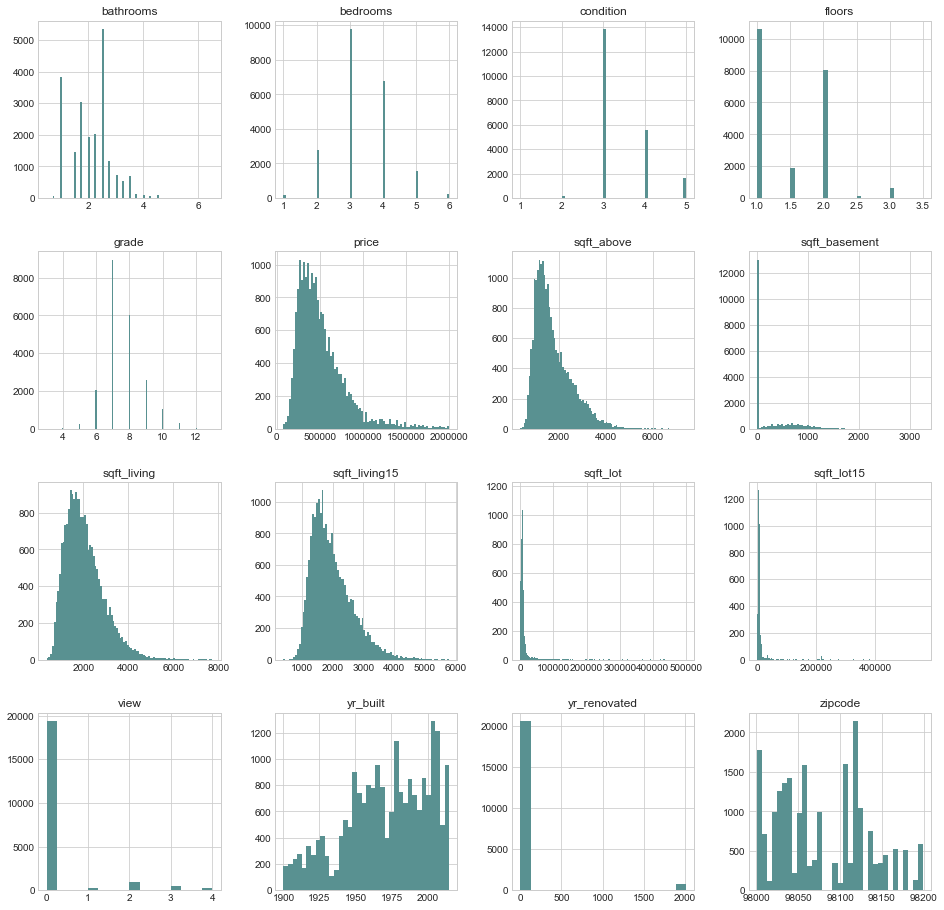

In [18]:
# Plot initial histograms to get a sense of which variables have a relationship and their distribution 

predictors_subset = ['price',
                     'bedrooms',
                     'bathrooms',
                     'floors',
                     'view',
                     'sqft_living',
                     'sqft_lot',
                     'condition',
                     'grade',
                     'sqft_above',
                     'sqft_basement',
                     'yr_built',
                     'yr_renovated',
                     'zipcode',
                     'sqft_living15',
                     'sqft_lot15']
house_sales_pred = house_sales.loc[:, predictors_subset]

house_sales_pred.hist(figsize=(16,16), bins='auto');

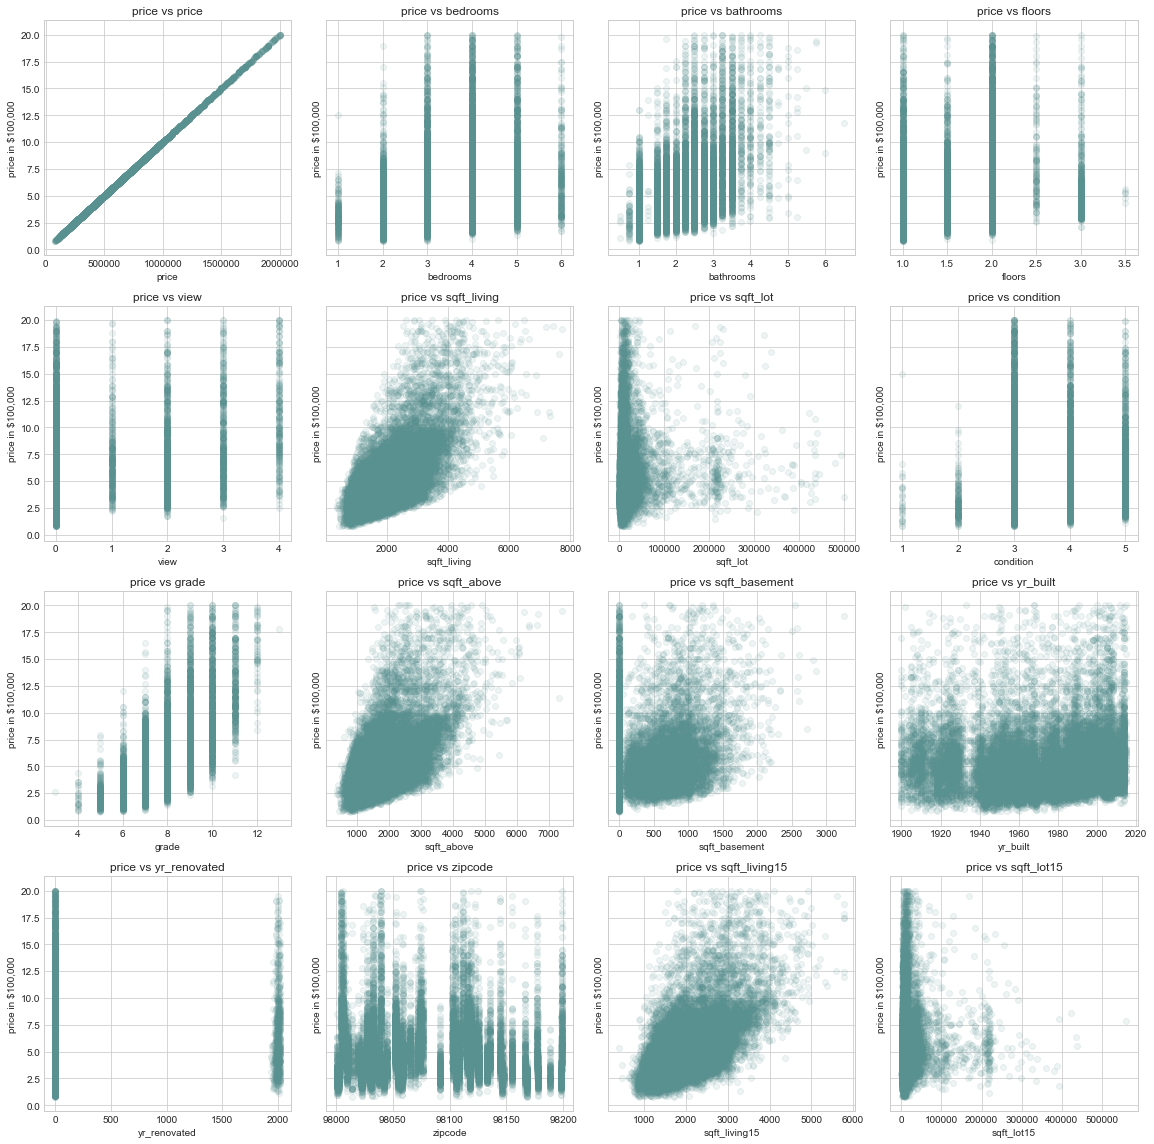

In [19]:
# Check the linearity assumption for all chosen features and highlight categorical variables

fig,axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16), sharey=True)

for ax,column in zip(axes.flatten(), house_sales_pred.columns):
    ax.scatter(house_sales_pred[column], house_sales_pred['price'] / 100000, label=column, alpha=0.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('price in $100,000')
    
fig.tight_layout()

In [20]:
# Initial check for multicollinearity

house_sales_coll = house_sales.drop(['price'], axis=1)

hs_coll = house_sales_coll.corr().abs().stack().reset_index().sort_values(0, ascending=False)
hs_coll['pairs'] = list(zip(hs_coll.level_0, hs_coll.level_1))
hs_coll.set_index(['pairs'], inplace=True)
hs_coll.drop(columns=['level_1','level_0'], inplace=True)
hs_coll.columns = ['cc']
hs_coll.drop_duplicates(inplace=True)
hs_coll[(hs_coll.cc > 0.75) & (hs_coll.cc < 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.867746
"(sqft_lot, sqft_lot15)",0.780684
"(sqft_living, sqft_living15)",0.758148
"(sqft_living, grade)",0.750670


In [21]:
# Create an initial, basic linear regression model using sqft_living which appears to meet the linearity assumption

f_one = 'price~sqft_living'

model_one = ols(formula=f_one, data=house_sales).fit()

model_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                 1.832e+04
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:23:35   Log-Likelihood:            -2.9163e+05
No. Observations:               21323   AIC:                         5.833e+05
Df Residuals:                   21321   BIC:                         5.833e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.296e+04   3730.696     14.195      0.000    4.56e+04    6.03e+04
sqft_living   227.3833      1.680    135.368      0.000     224.091     230.676
==============================================================================
Omnibus:                     5360.783   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17978.374
Skew:                           1.261   Prob(JB):                         0.00
Kurtosis:                       6.725   Cond. No.                     5.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

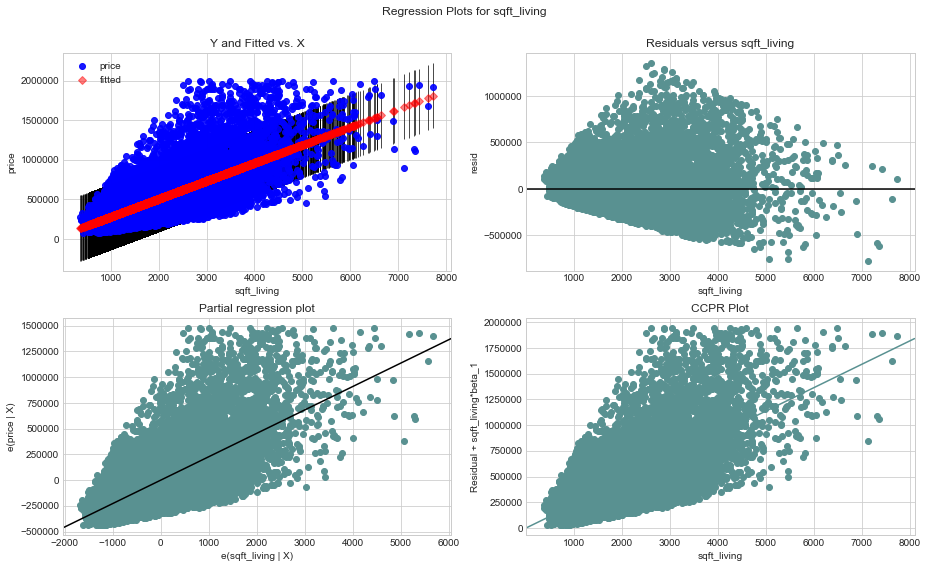

In [22]:
# Model v0.1 - visualise the error terms
fig = plt.figure(figsize=(13,8))
fig = sm.graphics.plot_regress_exog(model_one, "sqft_living", fig=fig)
plt.show();

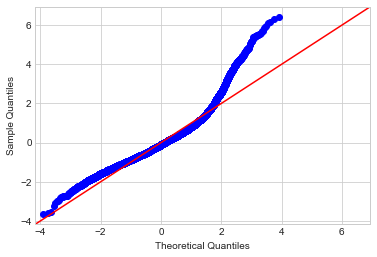

In [23]:
# Model v0.1 - check the normality assumption
residuals_one = model_one.resid
fig = sm.graphics.qqplot(residuals_one, dist=stats.norm, line='45', fit=True)
fig.show()

#### Model v0.1 - Conclusion

At first glance, sqft_living appears to meet the linearity assumption but, having created an initial basic model, it appears to be heteroscedastic.  In addition, looking at the qq plot, the model residuals do not appear to be normally distributed. 

The p-value is within acceptable limits, **R-squared = 0.463**

---
<a name="model-v02"></a>
### B. Model v0.2

Let's try log scaling and normalising the continuous variables to see if that improves the model.  
At the same time, we'll pre-flight the categorical variables so that they are ready to be added to the model when required.

In [59]:
# Log transform continuous variables and one-hot encode categoricals

continuous = ['price','sqft_living','sqft_lot']
categoricals = ['bedrooms','view','zipcode']

house_sales_cont = house_sales[continuous]

# Log features

log_names = [f'{column}_log' for column in house_sales_cont.columns]

house_sales_log = np.log(house_sales_cont)
house_sales_log.columns = log_names

# Normalize

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

house_sales_log_norm = house_sales_log.apply(normalize)

# One hot encode categoricals

house_sales_ohe = pd.get_dummies(house_sales[categoricals], columns=categoricals, drop_first=True)

house_sales_wf = house_sales['waterfront']
hs_preprocessed = pd.concat([house_sales_log_norm, house_sales_wf, house_sales_ohe], axis=1)

hs_preprocessed.head()

,price_log,sqft_living_log,sqft_lot_log,waterfront,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,view_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-1.439226,-1.125266,-0.377061,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.332485,0.755137,-0.088836,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.857872,-2.156502,0.285824,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.563975,0.100561,-0.518963,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.225562,-0.271830,0.038293,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
f_two = 'price_log~sqft_living_log'

model_two = ols(formula=f_two, data=hs_preprocessed).fit()

model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                 1.601e+04
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:24:05   Log-Likelihood:                -24283.
No. Observations:               21323   AIC:                         4.857e+04
Df Residuals:                   21321   BIC:                         4.859e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.622e-15      0.005  -3.13e-13      1.000      -0.010       0.010
sqft_living_log     0.6549      0.005    126.535      0.000       0.645       0.665
==============================================================================
Omnibus:                      187.582   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.890
Skew:                           0.044   Prob(JB):                     4.61e-28
Kurtosis:                       2.634   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

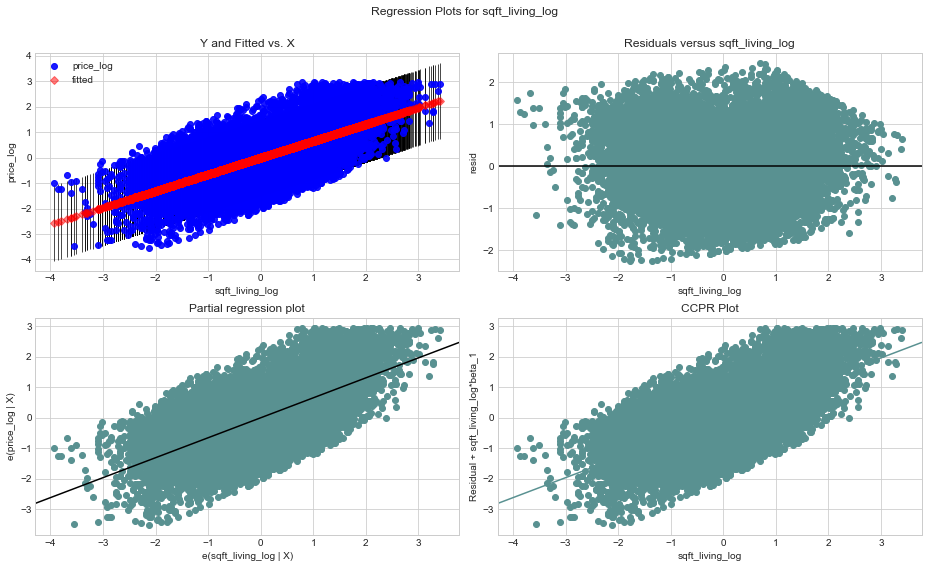

In [26]:
# Model v0.2 - visualise the error terms
fig = plt.figure(figsize=(13,8))
fig = sm.graphics.plot_regress_exog(model_two, "sqft_living_log", fig=fig)
plt.show();

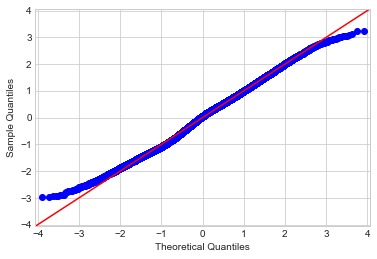

In [27]:
# Model v0.2 - check the normality assumption
residuals_two = model_two.resid
fig = sm.graphics.qqplot(residuals_two, dist=stats.norm, line='45', fit=True)
fig.show();

#### Model v0.2 - Conclusion

Scaling and normalising the variables has improved the model with regard the assumptions for linear regression with residuals being more normally distributed and the appearance of homoscedasticity.   

The p-value remains within acceptable bounds but the overall fit for the model has also reduced, **R-squared = 0.429**

---
<a name="model-v03"></a>
### C. Model v0.3

From the plots above, we can see that zip code has a noticeable effect on gradient of the relationship between sqft_living and price, with living space having a greater effect on price in certain zip codes than others.

Let's briefly filter our dataset based on a single zipcode to see what effect it has on our model before considering including zip codes more formally in our overall model.

In [28]:
# Filter the preprocessed dataframe by a specific zipcode

zip_98118 = hs_preprocessed[(hs_preprocessed['zipcode_98118'] == 1)]

# Create the formula

f_98118 = 'price_log~sqft_living_log'

model_98118 = ols(formula=f_98118, data=zip_98118).fit()

model_98118.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     351.8
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           7.09e-60
Time:                        21:24:21   Log-Likelihood:                -494.86
No. Observations:                 504   AIC:                             993.7
Df Residuals:                     502   BIC:                             1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1233      0.032     -3.857      0.000      -0.186      -0.061
sqft_living_log     0.5235      0.028     18.756      0.000       0.469       0.578
==============================================================================
Omnibus:                        4.612   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.319
Skew:                          -0.020   Prob(JB):                        0.190
Kurtosis:                       2.604   Cond. No.                         1.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

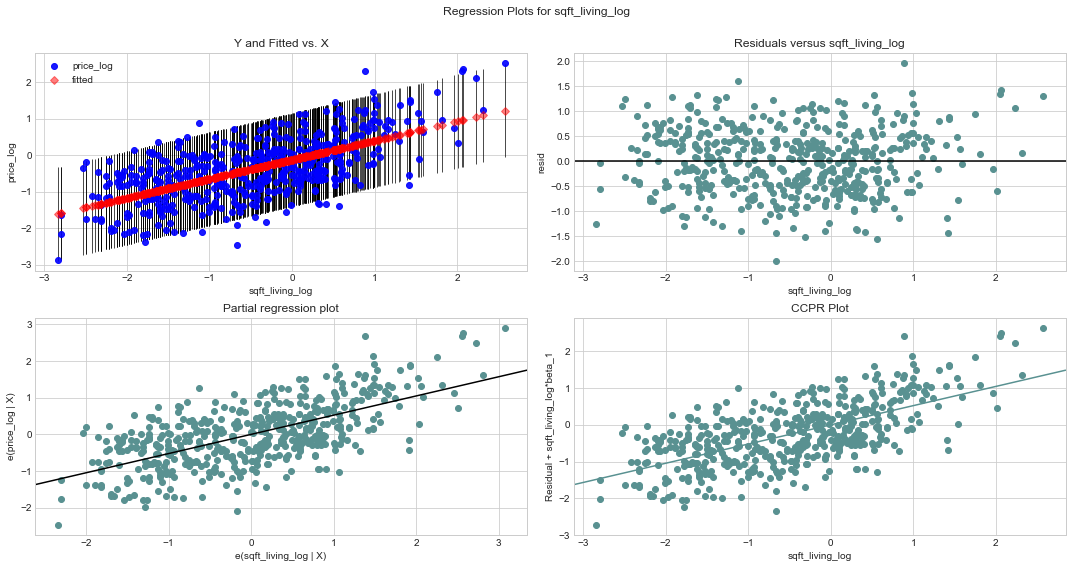

In [29]:
# Model v0.3 - visualise the error terms
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_98118, "sqft_living_log", fig=fig)
plt.show();

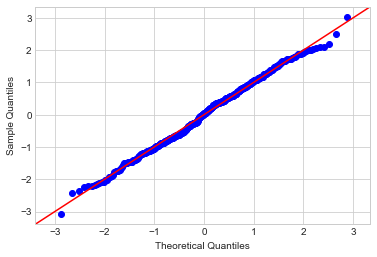

In [30]:
# Model v0.3 - check the normality assumption
residuals_98118 = model_98118.resid
fig = sm.graphics.qqplot(residuals_98118, dist=stats.norm, line='45', fit=True)
fig.show();

---
<a name="model-v10"></a>
### D. Model v1.0

This model represents the first multivariate linear regression model and has been reached after multiple iterations which started by adding all the predictors that made sense the point of view of the Business Case.  Certain predictors have been dropped as they had p-values of greater than 0.05 or because they did not improve the overall fit of the model.

In [82]:
outcome = 'price_log'
predictors = hs_preprocessed.drop(['price_log'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_four = ols(formula=formula, data=hs_preprocessed).fit()
model_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1405.
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:04:49   Log-Likelihood:                -10459.
No. Observations:               21240   AIC:                         2.108e+04
Df Residuals:                   21158   BIC:                         2.173e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8699      0.036    -23.929      0.000      -0.941      -0.799
sqft_living_log     0.5647      0.004    137.927      0.000       0.557       0.573
sqft_lot_log        0.0964      0.004     27.092      0.000       0.089       0.103
waterfront          0.7894      0.047     16.657      0.000       0.697       0.882
bedrooms_2         -0.1001      0.030     -3.372      0.001      -0.158      -0.042
bedrooms_3         -0.1897      0.030     -6.399      0.000      -0.248      -0.132
bedrooms_4         -0.2030      0.031     -6.628      0.000      -0.263      -0.143
bedrooms_5         -0.2929      0.032     -9.050      0.000      -0.356      -0.229
bedrooms_6         -0.4250      0.040    -10.734      0.000      -0.503      -0.347
view_1              0.2543      0.023     11.058      0.000       0.209       0.299
view_2              0.2827      0.014     20.338      0.000       0.255       0.310
view_3              0.4494      0.019     23.407      0.000       0.412       0.487
view_4              0.7096      0.030     23.368      0.000       0.650       0.769
zipcode_98002      -0.0368      0.035     -1.050      0.294      -0.106       0.032
zipcode_98003       0.0816      0.032      2.583      0.010       0.020       0.144
zipcode_98004       2.4093      0.032     75.998      0.000       2.347       2.471
zipcode_98005       1.6634      0.037     44.768      0.000       1.591       1.736
zipcode_98006       1.4852      0.028     53.455      0.000       1.431       1.540
zipcode_98007       1.4500      0.040     36.480      0.000       1.372       1.528
zipcode_98008       1.3658      0.032     42.972      0.000       1.304       1.428
zipcode_98010       0.5154      0.045     11.327      0.000       0.426       0.605
zipcode_98011       0.9580      0.035     27.131      0.000       0.889       1.027
zipcode_98014       0.5711      0.043     13.362      0.000       0.487       0.655
zipcode_98019       0.6475      0.036     17.998      0.000       0.577       0.718
zipcode_98022       0.0966      0.034      2.807      0.005       0.029       0.164
zipcode_98023       0.0002      0.027      0.008      0.994      -0.054       0.054
zipcode_98024       0.8729      0.051     17.138      0.000       0.773       0.973
zipcode_98027       1.1511      0.029     39.876      0.000       1.094       1.208
zipcode_98028       0.8632      0.032     27.385      0.000       0.801       0.925
zipcode_98029       1.3986      0.031     45.596      0.000       1.338       1.459
zipcode_98030       0.1315      0.032      4.056      0.000       0.068       0.195
zipcode_98031       0.1861      0.032      5.846      0.000       0.124       0.248
zipcode_98032      -0.0255      0.041     -0.619      0.536      -0.106       0.055
zipcode_98033       1.6972      0.029     59.500      0.000

#### Model v1.0 - Conclusion

Jarque-Bera test score is too high suggesting that the distribution of residuals is not normal thereby to meeting one of the assumptions of linear regression

---
<a name="model-v11"></a>
### E. Model v1.1

This model has been reached after performing stepwise selection of predictors and that made sense the point of view of the Business Case.  Certain predictors have been dropped as they had p-values of greater than 0.05.

#### Perform stepwise predictor selection

In [243]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [245]:
X = hs_preprocessed.drop('price_log', axis=1)
y = hs_preprocessed['price_log']

result = stepwise_selection(X, y, verbose = True)
print('Resulting features:')
print(result)

Add  sqft_living_log                with p-value 0.0
Add  zipcode_98023                  with p-value 1.52034e-209
Add  zipcode_98004                  with p-value 3.90005e-204
Add  zipcode_98042                  with p-value 7.52803e-174
Add  zipcode_98038                  with p-value 2.94422e-132
Add  zipcode_98092                  with p-value 2.58736e-141
Add  zipcode_98003                  with p-value 2.34671e-131
Add  zipcode_98002                  with p-value 1.80439e-130
Add  zipcode_98030                  with p-value 4.0763e-134
Add  zipcode_98058                  with p-value 3.48029e-138
Add  zipcode_98168                  with p-value 2.54382e-146
Add  zipcode_98031                  with p-value 1.60984e-153
Add  zipcode_98198                  with p-value 1.33759e-138
Add  zipcode_98112                  with p-value 2.84137e-129
Add  view_4                         with p-value 4.0917e-129
Add  zipcode_98178                  with p-value 1.3379e-126
Add  zipcode_98055  

In [248]:
developers_predictors = hs_preprocessed.drop([
    'zipcode_98058',
    'zipcode_98038',
    'zipcode_98055',
    'zipcode_98178',
    'zipcode_98031',
    'zipcode_98188',
    'zipcode_98030', 
    'zipcode_98198',
    'zipcode_98022',
    'zipcode_98003',                
    'zipcode_98168',          
    'zipcode_98092'    
], axis=1)

outcome = 'price_log'
predictors = developers_predictors.drop(['price_log'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_five = ols(formula=formula, data=developers_predictors).fit()
model_five.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1611.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:00:03   Log-Likelihood:                -10674.
No. Observations:               21240   AIC:                         2.149e+04
Df Residuals:                   21170   BIC:                         2.204e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6665      0.031    -21.736      0.000      -0.727      -0.606
sqft_living_log     0.5699      0.004    138.836      0.000       0.562       0.578
sqft_lot_log        0.0928      0.004     26.010      0.000       0.086       0.100
waterfront          0.7919      0.048     16.561      0.000       0.698       0.886
bedrooms_2         -0.1019      0.030     -3.399      0.001      -0.161      -0.043
bedrooms_3         -0.1928      0.030     -6.443      0.000      -0.251      -0.134
bedrooms_4         -0.2059      0.031     -6.659      0.000      -0.266      -0.145
bedrooms_5         -0.2977      0.033     -9.113      0.000      -0.362      -0.234
bedrooms_6         -0.4315      0.040    -10.802      0.000      -0.510      -0.353
view_1              0.2461      0.023     10.621      0.000       0.201       0.292
view_2              0.2731      0.014     19.543      0.000       0.246       0.300
view_3              0.4358      0.019     22.575      0.000       0.398       0.474
view_4              0.7006      0.031     22.870      0.000       0.641       0.761
zipcode_98002      -0.2351      0.029     -8.062      0.000      -0.292      -0.178
zipcode_98004       2.2084      0.025     88.680      0.000       2.160       2.257
zipcode_98005       1.4628      0.032     46.151      0.000       1.401       1.525
zipcode_98006       1.2850      0.020     65.768      0.000       1.247       1.323
zipcode_98007       1.2497      0.035     35.978      0.000       1.182       1.318
zipcode_98008       1.1675      0.025     46.705      0.000       1.118       1.216
zipcode_98010       0.3197      0.041      7.731      0.000       0.239       0.401
zipcode_98011       0.7570      0.029     25.715      0.000       0.699       0.815
zipcode_98014       0.3771      0.038      9.864      0.000       0.302       0.452
zipcode_98019       0.4483      0.030     14.807      0.000       0.389       0.508
zipcode_98023      -0.1988      0.019    -10.441      0.000      -0.236      -0.161
zipcode_98024       0.6797      0.047     14.343      0.000       0.587       0.773
zipcode_98027       0.9505      0.021     45.053      0.000       0.909       0.992
zipcode_98028       0.6636      0.025     26.903      0.000       0.615       0.712
zipcode_98029       1.1952      0.024     50.830      0.000       1.149       1.241
zipcode_98032      -0.2229      0.036     -6.123      0.000      -0.294      -0.152
zipcode_98033       1.4970      0.021     72.677      0.000       1.457       1.537
zipcode_98034       0.9219      0.018     49.989      0.000       0.886       0.958
zipcode_98039       2.5558      0.075     34.190      0.000       2.409       2.702
zipcode_98040       1.8105      0.026     70.013      0.000       1.760       1.861
zipcode_98042      -0.0134      0.018     -0.729      0.466

---
<a name="model-v12"></a>
### F. Model v1.2

This final model has been reached after multiple (manual) iterations which started by adding all the predictors that made sense the point of view of the Business Case.  Certain predictors have been dropped as they had p-values of greater than 0.05 or because they did not improve the overall fit of the model.  

Most importantly, this model achieves the necessary Jarque-Bera test score to fulfill the assumption for linear regression.

In [253]:
developers_predictors_2 = hs_preprocessed.drop([
#     'zipcode_98002',
#     'zipcode_98003', 
    'zipcode_98004',
#     'zipcode_98005', 
#     'zipcode_98006', 
#     'zipcode_98007', 
#     'zipcode_98008',
#     'zipcode_98010', 
    'zipcode_98011', 
#     'zipcode_98014', 
#     'zipcode_98019',
#     'zipcode_98022', 
#     'zipcode_98023',
#     'zipcode_98024', 
    'zipcode_98027', 
    'zipcode_98028',
#     'zipcode_98029', 
    'zipcode_98030', 
    'zipcode_98031', 
#     'zipcode_98032',    
    'zipcode_98033',
    'zipcode_98034', 
    'zipcode_98038', 
#     'zipcode_98039', 
    'zipcode_98040',
    'zipcode_98042', 
#     'zipcode_98045', 
    'zipcode_98052', 
    'zipcode_98053',
    'zipcode_98055', 
    'zipcode_98056', 
    'zipcode_98058', 
    'zipcode_98059',
    'zipcode_98065', 
    'zipcode_98070', 
    'zipcode_98072', 
    'zipcode_98074',
    'zipcode_98075', 
    'zipcode_98077', 
    'zipcode_98092', 
    'zipcode_98102',
    'zipcode_98103', 
    'zipcode_98105', 
    'zipcode_98106', 
    'zipcode_98107',
    'zipcode_98108', 
    'zipcode_98109', 
    'zipcode_98112', 
    'zipcode_98115',
    'zipcode_98116', 
    'zipcode_98117', 
    'zipcode_98118', 
    'zipcode_98119',
    'zipcode_98122', 
#     'zipcode_98125', 
    'zipcode_98126', 
#     'zipcode_98133',
#     'zipcode_98136', 
#     'zipcode_98144', 
#     'zipcode_98146', 
    'zipcode_98148',
    'zipcode_98155', 
    'zipcode_98166', 
    'zipcode_98168', 
    'zipcode_98177',
    'zipcode_98178', 
    'zipcode_98188', 
    'zipcode_98198', 
    'zipcode_98199'
], 
axis=1)

# developers_predictors.columns

outcome_2 = 'price_log'
predictors_2 = developers_predictors_2.drop(['price_log'], axis=1)
pred_sum_2 = '+'.join(predictors_2.columns)
formula_2 = outcome_2 + '~' + pred_sum_2
model_six = ols(formula=formula_2, data=developers_predictors_2).fit()
model_six.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     816.0
Date:                Sat, 19 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:12:19   Log-Likelihood:                -21432.
No. Observations:               21240   AIC:                         4.293e+04
Df Residuals:                   21206   BIC:                         4.320e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4419      0.049      8.934      0.000       0.345       0.539
sqft_living_log     0.6991      0.006    107.591      0.000       0.686       0.712
sqft_lot_log       -0.0854      0.005    -16.844      0.000      -0.095      -0.075
waterfront          0.5267      0.078      6.755      0.000       0.374       0.680
bedrooms_2         -0.1614      0.050     -3.252      0.001      -0.259      -0.064
bedrooms_3         -0.4598      0.049     -9.302      0.000      -0.557      -0.363
bedrooms_4         -0.5317      0.051    -10.418      0.000      -0.632      -0.432
bedrooms_5         -0.5825      0.054    -10.806      0.000      -0.688      -0.477
bedrooms_6         -0.6748      0.066    -10.226      0.000      -0.804      -0.545
view_1              0.4365      0.038     11.459      0.000       0.362       0.511
view_2              0.4069      0.023     17.798      0.000       0.362       0.452
view_3              0.5489      0.032     17.309      0.000       0.487       0.611
view_4              0.7968      0.050     15.845      0.000       0.698       0.895
zipcode_98002      -1.0504      0.047    -22.113      0.000      -1.143      -0.957
zipcode_98003      -0.9186      0.040    -22.901      0.000      -0.997      -0.840
zipcode_98005       0.6916      0.052     13.367      0.000       0.590       0.793
zipcode_98006       0.4187      0.031     13.518      0.000       0.358       0.479
zipcode_98007       0.4243      0.057      7.463      0.000       0.313       0.536
zipcode_98008       0.3461      0.040      8.559      0.000       0.267       0.425
zipcode_98010      -0.2992      0.068     -4.399      0.000      -0.432      -0.166
zipcode_98014      -0.2184      0.063     -3.479      0.001      -0.341      -0.095
zipcode_98019      -0.3108      0.049     -6.292      0.000      -0.408      -0.214
zipcode_98022      -0.7929      0.046    -17.153      0.000      -0.884      -0.702
zipcode_98023      -0.9944      0.030    -32.842      0.000      -1.054      -0.935
zipcode_98024       0.1576      0.078      2.019      0.043       0.005       0.311
zipcode_98029       0.2372      0.038      6.298      0.000       0.163       0.311
zipcode_98032      -0.9866      0.060    -16.517      0.000      -1.104      -0.870
zipcode_98039       1.7236      0.124     13.947      0.000       1.481       1.966
zipcode_98045      -0.2001      0.047     -4.288      0.000      -0.292      -0.109
zipcode_98125       0.0898      0.033      2.684      0.007       0.024       0.155
zipcode_98133      -0.0904      0.031     -2.957      0.003      -0.150      -0.030
zipcode_98136       0.2529      0.042      6.048      0.000       0.171       0.335
zipcode_98144       0.1843      0.037      4.976      0.000       0.112       0.257
zipcode_98146      -0.4769      0.040    -12.019      0.000

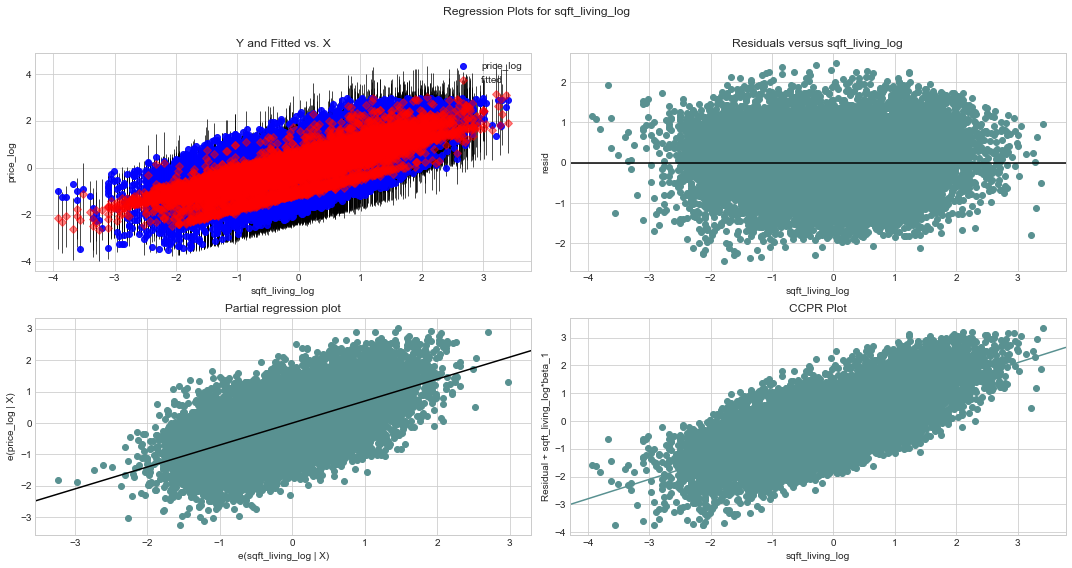

In [250]:
# Model v1.2 - visualise the error terms
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_six, "sqft_living_log", fig=fig)
plt.show();

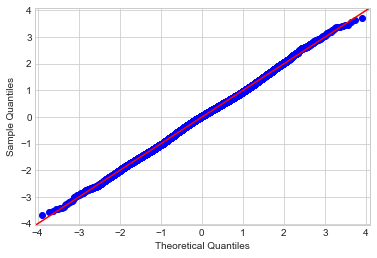

In [251]:
# Model v1.2 - check the normality assumption
residuals_six = model_six.resid
fig = sm.graphics.qqplot(residuals_six, dist=stats.norm, line='45', fit=True)
fig.show();

---
<a name="model-evaluation-train-test-split"></a>
### G. Model Evaluation using Train-Test Split

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = developers_predictors_2.drop(['price_log'], axis=1)
y = developers_predictors_2[['price_log']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

16992 4248 16992 4248


In [256]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', train_mse)
print('Test MSE:', test_mse)

Train MSE: 0.43911917878071555
Test MSE: 0.44680529922359763


---
<a name="model-evaluation-cross-validation"></a>
### H. Model Evaluation using Cross-Validation

In [257]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error'))

print(cv_5_results)

-0.4416345570833277
